In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm

[nltk_data] Downloading package punkt to /Users/neha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/neha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/neha/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/neha/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/neha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
os.chdir('/Users/neha/Desktop/work/data')
os.getcwd()

'/Users/neha/Desktop/work/data'

In [6]:
df = pd.read_csv('nykaa_reviews.csv')                                           
print(df.shape)
df = df.head(500)
print(df.shape)

(3222, 9)
(500, 9)


In [7]:
df.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
1,Ilteeza Islam,My little brother is using it . His mother lov...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
2,Zaneera,I've always used sebamed products for my kid. ...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
3,ANJALI SHENISHETTY,Great soaps for kids. Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"


In [8]:
df.drop(['verified','images','reviewed_at','_id','crawled_at'], axis=1, inplace=True)

In [10]:
df["id"] = df.index + 1 
df.head()

,name,description,rating,likes_count,id
0,deepa shetty,Super I loved it,5,0,1
1,Ilteeza Islam,My little brother is using it . His mother lov...,5,0,2
2,Zaneera,I've always used sebamed products for my kid. ...,5,0,3
3,ANJALI SHENISHETTY,Great soaps for kids. Smells amazing too,5,1,4
4,K.Latha,Nice soap with mild properties,5,1,5


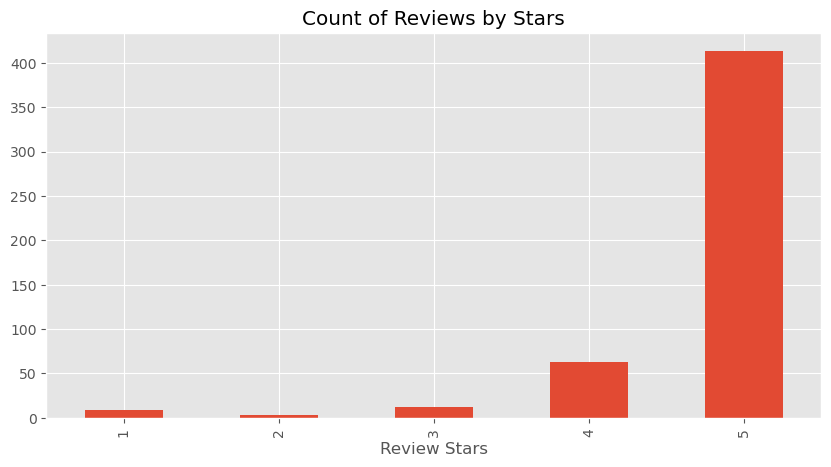

In [11]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [12]:
example = df['description'][50]
print(example)

Suits my baby sister’s skin perfectly..delicate??


In [13]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Suits',
 'my',
 'baby',
 'sister',
 '’',
 's',
 'skin',
 'perfectly',
 '..',
 'delicate']

In [14]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Suits', 'NNS'),
 ('my', 'PRP$'),
 ('baby', 'NN'),
 ('sister', 'NN'),
 ('’', 'NNP'),
 ('s', 'VBZ'),
 ('skin', 'FW'),
 ('perfectly', 'RB'),
 ('..', 'JJ'),
 ('delicate', 'NN')]

In [15]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Suits/NNS
  my/PRP$
  baby/NN
  sister/NN
  ’/NNP
  s/VBZ
  skin/FW
  perfectly/RB
  ../JJ
  delicate/NN
  ?/.
  ?/.)


In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [18]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['description']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [19]:
nykaa = pd.DataFrame(res).T
nykaa = nykaa.reset_index().rename(columns={'index': 'Id'})
result = pd.concat([nykaa, df], axis=1)
result.head()

,Id,neg,neu,pos,compound,name,description,rating,likes_count,id
0,1,0.000,0.114,0.886,0.8316,deepa shetty,Super I loved it,5,0,1
1,2,0.000,0.709,0.291,0.5719,Ilteeza Islam,My little brother is using it . His mother lov...,5,0,2
2,3,0.394,0.606,0.000,-0.6369,Zaneera,I've always used sebamed products for my kid. ...,5,0,3
3,4,0.000,0.388,0.612,0.8360,ANJALI SHENISHETTY,Great soaps for kids. Smells amazing too,5,1,4
4,5,0.000,0.588,0.412,0.4215,K.Latha,Nice soap with mild properties,5,1,5


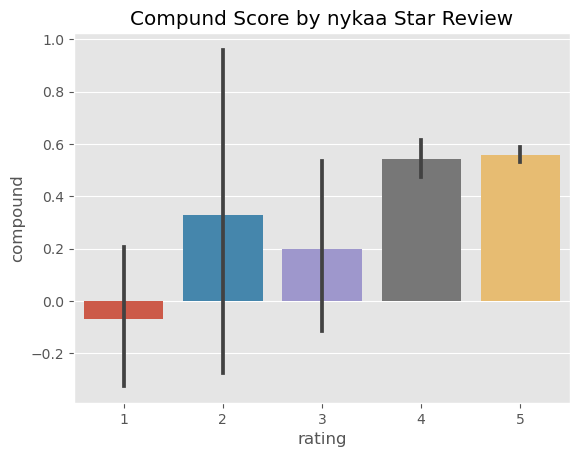

In [20]:
ax = sns.barplot(data=result,x = df['rating'], y ='compound')
ax.set_title('Compund Score by nykaa Star Review')
plt.show()




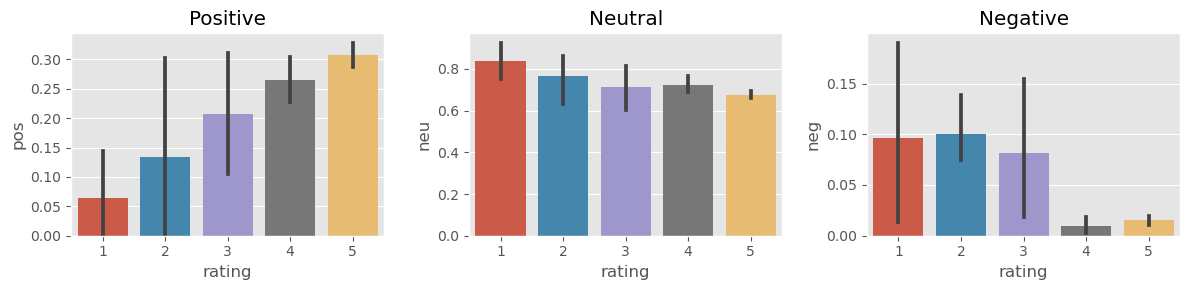

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=result, x=df['rating'], y='pos', ax=axs[0])
sns.barplot(data=result, x=df['rating'], y='neu', ax=axs[1])
sns.barplot(data=result, x=df['rating'], y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [2]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

tokenizer = RobertaTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
model = RobertaForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")


In [22]:
print(example)
sia.polarity_scores(example)

Suits my baby sister’s skin perfectly..delicate??


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [25]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.014381197, 'roberta_neu': 0.9425872, 'roberta_pos': 0.024530996}


In [24]:
from scipy.special import softmax

In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [27]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['description']
        myid = row['id']
        nykaa_result = sia.polarity_scores(text)
        nykaa_result_rename = {}
        for key, value in nykaa_result.items():
            nykaa_result_rename[f"nykaa_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**nykaa_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [28]:
final_df = pd.DataFrame(res).T
final_df = final_df.reset_index().rename(columns={'index': 'Id'})
#nykaa = nykaa.reset_index().rename(columns={'index': 'Id'})
final_df = pd.concat([final_df, df], axis=1)

In [29]:
final_df.columns

Index(['Id', 'nykaa_neg', 'nykaa_neu', 'nykaa_pos', 'nykaa_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'name', 'description',
       'rating', 'likes_count', 'id'],
      dtype='object')

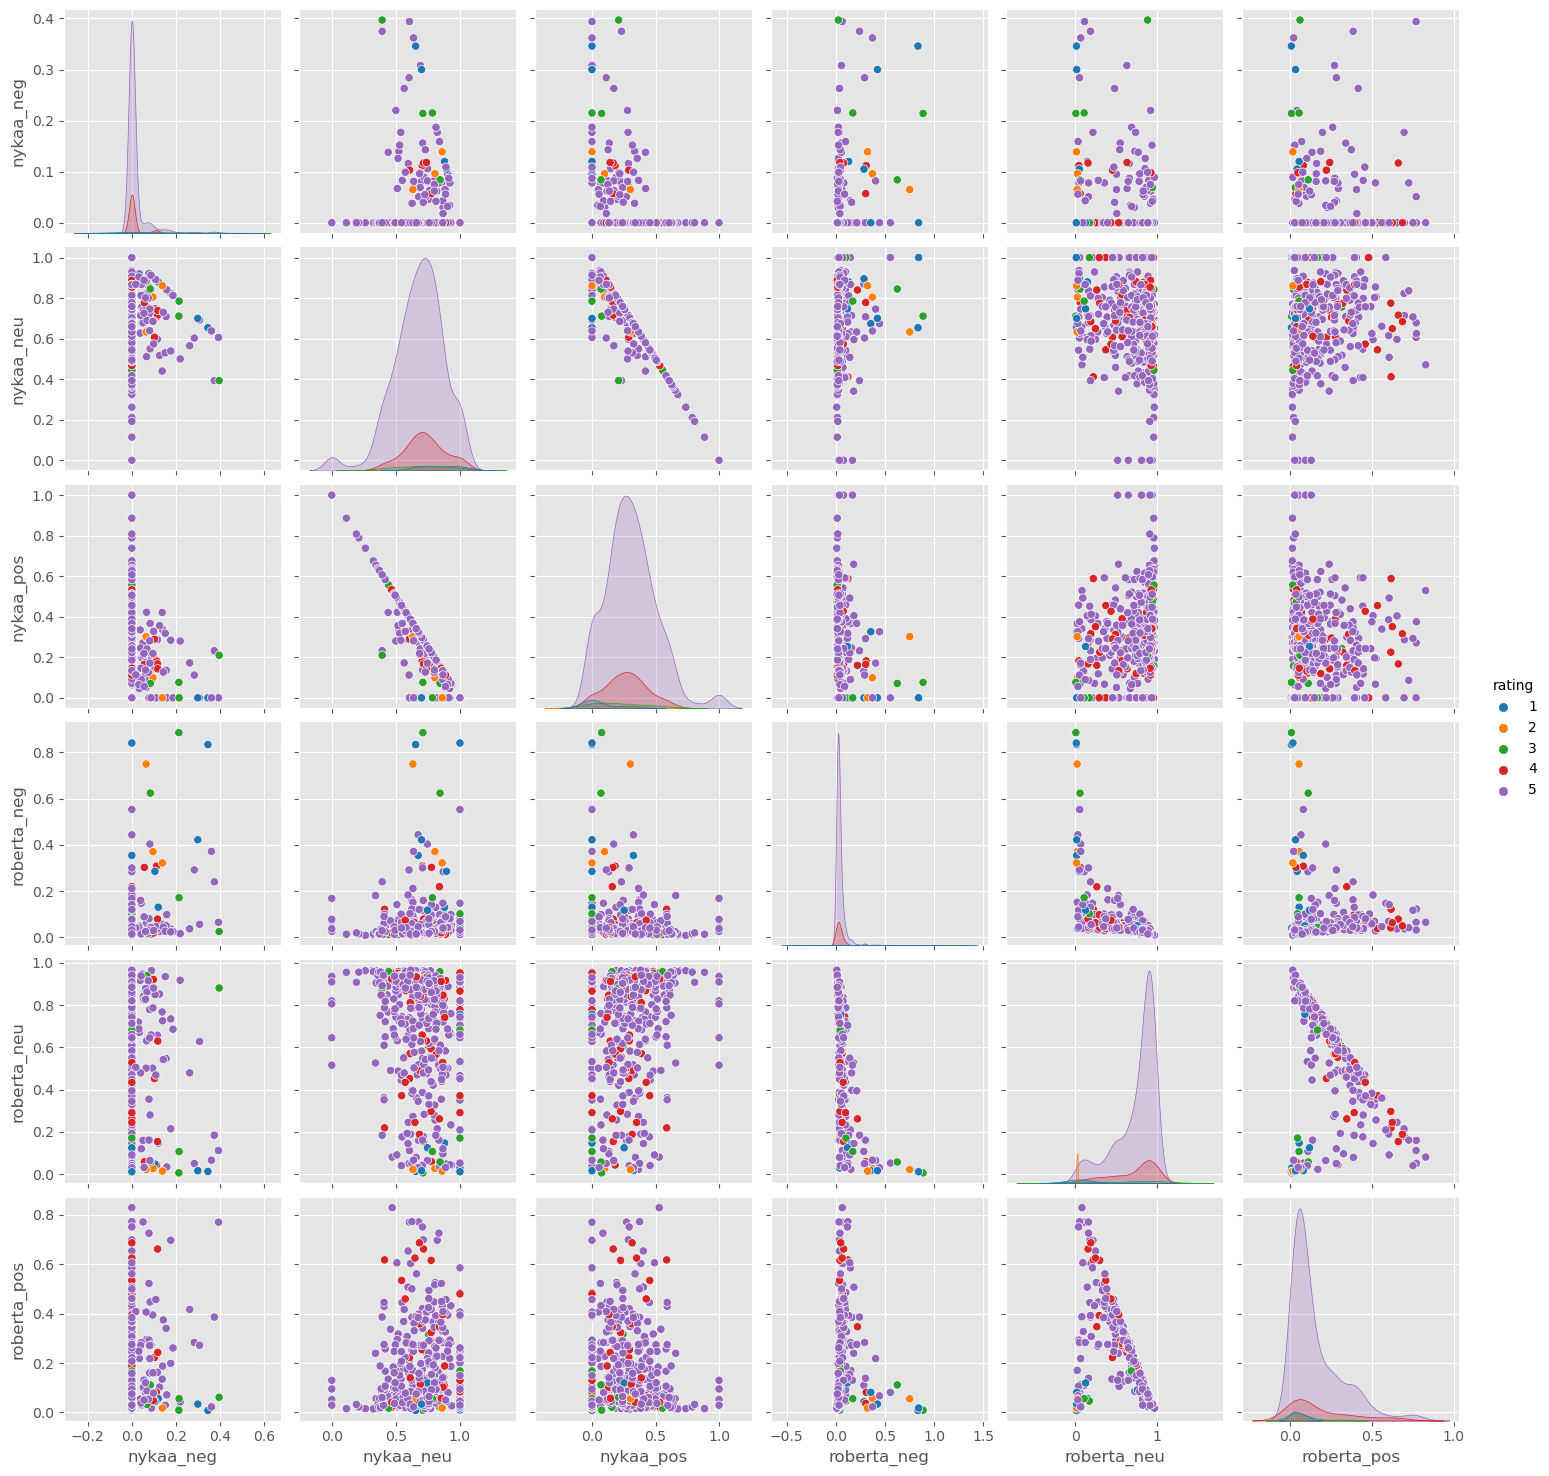

In [31]:
sns.pairplot(data=final_df,
             vars=['nykaa_neg', 'nykaa_neu', 'nykaa_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

In [33]:
final_df.query('rating == 1') \
    .sort_values('roberta_pos', ascending=False)['description'].values[0]

"My baby's hair became rough after using this product better go for Johnson baby products or Himalaya baby care products."

In [42]:
final_df.query('rating == 1') \
    .sort_values('nykaa_pos', ascending=False)['description'].values[2]

'Iam really confused about the color of the soap..bz always I bought white color bar..bt this time I got cream color bar'

In [36]:
final_df.query('rating == 5') \
    .sort_values('roberta_neg', ascending=False)['description'].values[0]

'It’s quite expensive for a soap bar but u r actually paying for the quality . '

In [40]:
final_df.query('rating == 5') \
    .sort_values('nykaa_neg', ascending=False)['description'].values[2]

'Body lotion smells weird '